#### Linear Regression

Linear Regression is a supervised learning algorithm that models the relationship between a dependent variable `y` and one or more independent variables `X` by fitting a straight line to the data.

The equation for simple linear regression is:

y = wX + b

where:

* `w` is the weight (slope)
* `b` is the bias (intercept)

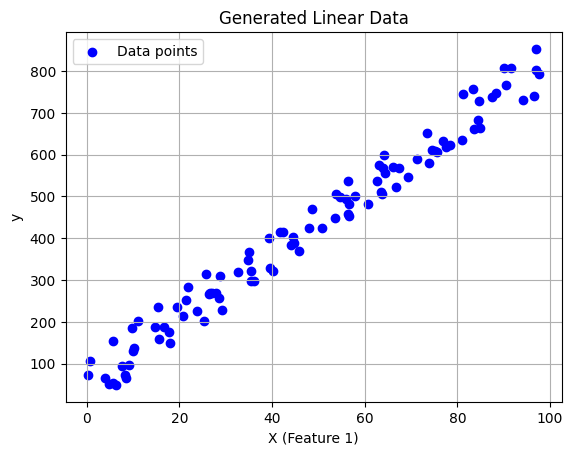

True weights: [7.69519481 1.22667439]
True bias: -2.129393249318823


In [66]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(n_samples=100, n_features=1, noise_variance=1.0):
    # Generate random features
    X = np.random.uniform(0, 100, size=(n_samples, n_features))

    # Define true weights and bias
    true_weights = np.random.uniform(1, 10, size=n_features)
    true_bias = np.random.uniform(-5, 5)

    # Calculate the target variable with some noise
    noise = np.random.normal(0, noise_variance, size=n_samples)
    y = X @ true_weights + true_bias + noise

    return X, y, true_weights, true_bias

# Generate synthetic data
X, y, true_weights, true_bias = generate_linear_data(n_samples=100, n_features=2, noise_variance=1.0)

# Select the first feature for plotting
X_plot = X[:, 0]  # Select the first feature

# Plot the generated data
plt.scatter(X_plot, y, color='blue', label='Data points')
plt.xlabel('X (Feature 1)')
plt.ylabel('y')
plt.title('Generated Linear Data')
plt.legend()
plt.grid()
plt.show()

# Display true parameters
print("True weights:", true_weights)
print("True bias:", true_bias)


In [67]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.0001, n_iters=10000):  # Adjusted learning rate
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Feature scaling
        
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)  # Initialized to zero
        self.bias = 0
        
        tol = 1e-5
        prev_loss = float('inf')  # Start with a high loss for comparison
        
        for i in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            
            # Calculate gradients
            dw = (1/n_samples) * (np.dot(X.T, (y_pred - y)))
            db = (1/n_samples) * (np.sum(y_pred - y))
            
            # Update weights and bias
            self.weights -= (self.lr * dw)
            self.bias -= (self.lr * db)
            
            # Calculate current loss
            current_loss = np.mean(np.square(y_pred - y))
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {current_loss}")  # Print loss
            
            # Check for convergence
            if abs(current_loss - prev_loss) < tol:
                break
            
            prev_loss = current_loss
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [68]:
lr = LinearRegression()
lr.fit(X, y)

Iteration 0: Loss = 224647.97508372567
Iteration 100: Loss = 220211.07182141687
Iteration 200: Loss = 215861.83782998883
Iteration 300: Loss = 211598.54009879762
Iteration 400: Loss = 207419.47988928205
Iteration 500: Loss = 203322.99205690972
Iteration 600: Loss = 199307.44438654368
Iteration 700: Loss = 195371.2369409629
Iteration 800: Loss = 191512.80142227918
Iteration 900: Loss = 187730.60054599095
Iteration 1000: Loss = 184023.12742742748
Iteration 1100: Loss = 180388.90498033556
Iteration 1200: Loss = 176826.48532736977
Iteration 1300: Loss = 173334.44922225003
Iteration 1400: Loss = 169911.4054833552
Iteration 1500: Loss = 166555.9904385273
Iteration 1600: Loss = 163266.86738086297
Iteration 1700: Loss = 160042.7260352754
Iteration 1800: Loss = 156882.28203561401
Iteration 1900: Loss = 153784.27641213176
Iteration 2000: Loss = 150747.47508909568
Iteration 2100: Loss = 147770.6683923404
Iteration 2200: Loss = 144852.67056656632
Iteration 2300: Loss = 141992.31930219146
Iteration

In [69]:
y_test = lr.predict(X)

In [70]:
y[:5], y_test[:5]

(array([633.22152661, 297.84236781, 506.81689003,  94.24994021,
        509.88756634]),
 array([11445.50695444,  5546.86585643,  9089.57945141,  1895.88301597,
         9320.20755947]))

#### Regularization Techniques

#### L1 Regularization (Lasso)
Adds the sum of absolute values of weights to the loss function. Useful for feature selection, as it forces some weights to be exactly zero.

#### L2 Regularization (Ridge)
Adds the sum of squared weights to the loss function. Helps with preventing overfitting by shrinking the weights.

#### Elastic Net
A combination of L1 and L2 regularization. Balances between feature selection and shrinking coefficients.

#### Loss Functions

- **L2 Regularization (Ridge)**:

$$
\text{Loss} = \text{MSE} + \lambda \sum w_i^2
$$

- **L1 Regularization (Lasso)**:

$$
\text{Loss} = \text{MSE} + \lambda \sum |w_i|
$$

Regularization in linear regression is applied in the following scenarios:

- Overfitting: When the model performs well on training data but poorly on test data, it indicates that the model is overfitting by capturing noise and irrelevant patterns in the data. Regularization helps by reducing the magnitude of the model coefficients, making the model less sensitive to fluctuations in the data and improving generalization.

- Multicollinearity: When features are highly correlated, multicollinearity can lead to instability in the model (large swings in coefficients). Regularization helps by shrinking the coefficients, thus reducing variance and stabilizing the model's predictions in the presence of collinear features.

- High-dimensional data: When the number of features is large compared to the number of samples, regularization is essential. High-dimensional models tend to overfit the data, and regularization constrains the model by penalizing large coefficients, improving performance on unseen data.

- Feature Selection: In situations where many features are irrelevant, L1 regularization (Lasso) can be applied to perform automatic feature selection by shrinking some coefficients to exactly zero, effectively removing those features from the model.

#### Best Use Case for Linear Regression

- **Use Case**: Predicting continuous outcomes like house prices, stock prices, or any application where the relationship between the independent variables and the dependent variable is linear or approximately linear.

- **Best Data**: Data where features have a linear relationship with the target variable.

When to Avoid Regularization?
- Underfitting: If the model is too simple and already underfitting the data (i.e., it is not capturing the underlying patterns), applying regularization can worsen the problem by overly shrinking the coefficients.
- Sufficiently Small Data and Few Features: If you have a small number of features and enough data to capture relationships, regularization might not be necessary.


#### Measuring Correlation Between Features in a Dataset

#### 1. Correlation Between Two Features

To measure the correlation between two numerical features, the most common metrics are **Pearson’s Correlation Coefficient**, **Spearman’s Rank Correlation**, and **Kendall’s Tau**.

#### **Pearson's Correlation Coefficient**
Pearson’s correlation measures the linear relationship between two variables. It returns a value between -1 and 1:
- +1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation,
- 0 means no correlation.

#### Formula:
**Pearson Correlation Coefficient (r):**

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \sum (Y_i - \bar{Y})^2}}
$$

Where:

- `X_i` and `Y_i` are the feature values,
- `\bar{X}` and `\bar{Y}` are the means of the features.

#### **Example using NumPy**:
```python
import numpy as np
import pandas as pd

# Assuming X and Y are two numpy arrays
correlation = np.corrcoef(X, Y)[0, 1]
print(correlation)

# Assuming df is a pandas DataFrame
correlation = df['feature1'].corr(df['feature2'])
print(correlation)
```

#### **Spearman’s Rank Correlation**
Spearman's rank correlation assesses how well the relationship between two variables can be described using a monotonic function. This is useful for non-linear but monotonic relationships.

```python
correlation = df['feature1'].corr(df['feature2'], method='spearman')
```

#### **Kendall’s Tau**
Kendall's Tau is used for ordinal data or small datasets, and it measures the correspondence between the rankings of two variables.

```python
correlation = df['feature1'].corr(df['feature2'], method='kendall')
```

#### 2. Correlation Between Multiple Features
To measure correlation between multiple features, you can compute pairwise correlations between all features and display them in a correlation matrix.

Using Pandas to Compute a Correlation Matrix:

```python
import pandas as pd

# Assuming df is a DataFrame with several numerical features
correlation_matrix = df.corr(method='pearson')  # or 'spearman', 'kendall'
print(correlation_matrix)
```

This will generate a matrix where:

- Each row and column represents a feature.
- Each cell contains the correlation between two features.

#### Visualizing the Correlation Matrix:
You can use seaborn to visualize the correlation matrix as a heatmap.

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
```

This will generate a heatmap where colors represent the strength and direction of correlations between the features.

#### 3. Interpretation of Correlation Values
Positive correlation (closer to 1): As one feature increases, the other tends to increase.
Negative correlation (closer to -1): As one feature increases, the other tends to decrease.
No correlation (around 0): There is no linear relationship between the features.

#### Summary
For two features, use np.corrcoef() or DataFrame.corr() with methods like Pearson, Spearman, or Kendall to compute the correlation.
For multiple features, use DataFrame.corr() to compute a correlation matrix and visualize it with a heatmap for easy interpretation.

#### Multicollinearity

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. This situation makes it difficult to isolate the effect of each independent variable on the dependent variable because they provide redundant information.

In linear regression, multicollinearity can lead to:

Unstable coefficients: Regression coefficients might change significantly with small changes in the model.
Inflated standard errors: Making hypothesis testing (t-tests) unreliable.
Difficulty in interpreting the model: It's hard to determine the contribution of each independent variable.
Common methods to detect multicollinearity:
Variance Inflation Factor (VIF): Measures how much the variance of a regression coefficient is inflated due to multicollinearity.
Condition Index: Assesses the dependency among the variables.

#### Variance Inflation Factor (VIF) and Condition Index

**Variance Inflation Factor (VIF)** quantifies how much the variance of a regression coefficient is inflated due to multicollinearity. It is calculated for each independent variable.

**Formula:**

$$VIF_i = \frac{1}{1 - R_i^2}$$

where `R_i^2` is the R-squared value obtained by regressing the `i`-th variable on all other independent variables.

* **Low VIF (< 5):** Low multicollinearity.
* **High VIF (> 10):** Significant multicollinearity.

**Condition Index (CI)**

Condition index assesses the dependency between independent variables using the eigenvalues of the matrix `X^TX`.

**Formula:**
$$CI = \frac{\text{largest eigenvalue}}{\text{smallest eigenvalue}}$$

* **Low CI (< 10):** Little multicollinearity.
* **High CI (> 30):** Severe multicollinearity.


### Assessing the Fit of a Linear Regression Model

#### 1. Residual Plots

Residual plots can help visualize the relationship between the residuals (the differences between observed and predicted values) and the independent variables or fitted values.

* **If the relationship is linear:** The residuals should be randomly scattered around the horizontal axis (zero line).
* **If a pattern is visible:** The relationship may be non-linear.

**How to calculate:** Fit a linear regression model and plot residuals using libraries like matplotlib or seaborn.

#### 2. Linearity Test in Linear Regression (ANOVA)

Perform an analysis of variance (ANOVA) to test whether the linear model explains a significant amount of variance in the dependent variable.

* **Low p-value:** A low p-value suggests a good fit.

**How to calculate:** Use libraries like `statsmodels` in Python for ANOVA tests.

#### 3. R-squared (Coefficient of Determination)

R-squared measures the proportion of variance in the dependent variable explained by the independent variables.

* **R-squared = 1:** Perfect linearity.
* **R-squared = 0:** No linearity.

**How to calculate:** Fit a linear regression model and get the R-squared score using `sklearn` or `statsmodels`.

#### 4. Partial Regression Plots (Component-Plus-Residual Plot)

These plots show the relationship between each independent variable and the dependent variable while controlling for other independent variables.

**How to calculate:** Use `statsmodels` in Python.

#### 5. Lack-of-Fit Test

This statistical test can help determine if a linear model is appropriate.

* **Small p-value:** Suggests a linear model is not appropriate.

**How to calculate:** Use specialized libraries in R or Python with `scipy.stats`.

#### 6. Linear Regression Coefficients

Analyze the coefficients of the fitted linear regression model. If the independent variables are strongly related to the dependent variable, their coefficients should be significantly different from zero (based on p-values).

**How to calculate:** Use linear regression models from `sklearn` or `statsmodels` in Python.

#### Comparison of Linear Regression Outputs: statsmodels vs. scikit-learn

**statsmodels** and **scikit-learn (sklearn)** are both popular Python libraries for statistical modeling and machine learning, respectively. While they can both be used to perform linear regression, they provide different outputs and focus on different aspects of the modeling process. Here's a comparison of their outputs:

#### 1. Basic Output

* **statsmodels:**
    - Provides a comprehensive summary, including coefficients, standard errors, t-values, p-values, R-squared, and confidence intervals.
    - Ideal for users interested in statistical properties and hypothesis testing.

* **scikit-learn:**
    - Focuses on prediction and provides simpler output with coefficients, intercept, and R-squared.
    - Suitable for machine learning applications where prediction is the primary goal.

#### 2. Use Cases

* **statsmodels:**
    - Exploratory data analysis where understanding relationships and significance of predictors is crucial.
    - Statistical inference and hypothesis testing.
* **scikit-learn:**
    - Predictive modeling and machine learning applications.
    - Easier integration into machine learning pipelines and workflows.

#### Summary

While both libraries can perform linear regression and provide the coefficients of the model, statsmodels offers a more detailed statistical analysis and diagnostic output, whereas scikit-learn is geared towards model fitting and prediction with a simpler output structure. Choose the library based on your specific needs, whether you prioritize statistical inference or predictive modeling.


### statsmodels Linear Regression Summary Output

When you print the summary of a linear regression model fitted using statsmodels, it provides a comprehensive overview of the model's results. Below are the key components of the output, along with explanations of each term and its significance.

#### Summary Output Components

#### 1. Model Information
- **Dep. Variable**: The dependent variable (response variable) for the regression model. This is the variable you are trying to predict.
- **Model**: Indicates the type of model used (e.g., OLS for Ordinary Least Squares).
- **Method**: The estimation method used to fit the model (e.g., Least Squares).
- **Date**: The date when the model was fitted.
- **Time**: The time when the model was fitted.
- **No. Observations**: The total number of observations (data points) used in the model.
- **Df Residuals**: Degrees of freedom of the residuals, calculated as the number of observations minus the number of parameters estimated.
- **Df Model**: Degrees of freedom of the model, which is equal to the number of predictors (independent variables) in the model.

#### 2. Statistical Measures
- **R-squared**: A statistical measure that represents the proportion of the variance for the dependent variable that is explained by the independent variables in the model. Values range from 0 to 1, with higher values indicating a better fit.
- **Adj. R-squared**: Adjusted R-squared, which adjusts the R-squared value based on the number of predictors in the model. This measure is useful for comparing models with different numbers of predictors.
- **F-statistic**: A measure of the overall significance of the model. It tests whether at least one predictor variable has a non-zero coefficient. Higher values indicate a more significant model.
- **Prob (F-statistic)**: The p-value associated with the F-statistic. A low p-value (typically < 0.05) indicates that the model is statistically significant.

#### 3. Coefficients Table
The coefficients table provides the following information for each predictor variable in the model:

- **coef**: The estimated coefficient for each predictor variable, representing the change in the dependent variable for a one-unit change in the predictor variable, assuming all other variables are held constant.
- **std err**: The standard error of the coefficient estimates, indicating the average distance that the estimated coefficients vary from the actual population value. Smaller values suggest more precise estimates.
- **t**: The t-statistic, calculated as the coefficient divided by its standard error. It tests the null hypothesis that the coefficient is equal to zero (no effect).
- **P>|t|**: The p-value associated with the t-statistic. A low p-value (typically < 0.05) indicates that the predictor variable is statistically significant in explaining the variation in the dependent variable.
- **[0.025, 0.975]**: The 95% confidence interval for the coefficient, which provides a range of values that is likely to contain the true coefficient value. If this interval does not include zero, it suggests the predictor is statistically significant.

#### 4. Additional Information
- **Omnibus**: A test statistic for the normality of residuals. The null hypothesis is that the residuals are normally distributed. 
- **Prob(Omnibus)**: The p-value associated with the Omnibus test. A low value indicates the residuals may not be normally distributed.
- **Skew**: The skewness of the residuals. A skewness of 0 indicates a symmetric distribution.
- **Kurtosis**: A measure of the "tailedness" of the residuals' distribution. Higher values indicate more outliers.
- **Cond. No.**: The condition number, which assesses the sensitivity of the model to small changes in the data. High values may indicate multicollinearity issues among predictor variables.

#### Summary
The statsmodels summary output provides a wealth of information about the fitted linear regression model, including details on model fit, significance of predictors, and diagnostic tests. Understanding these components is essential for interpreting the results and making informed decisions based on the model.


### Differences between R-squared and Adjusted R-squared

#### R-squared (R²)
- **Definition**: R-squared measures the proportion of the variance in the dependent variable that can be explained by the independent variables in the model. It indicates how well the model fits the data.
- **Calculation**: R² is calculated as:
$$
R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

where:

- `SS_res` is the residual sum of squares (the sum of squared differences between observed and predicted values).
- `SS_tot` is the total sum of squares (the sum of squared differences between observed values and the mean of the dependent variable).
  
- **Range**: R-squared values range from 0 to 1:
  - **0**: Indicates that the model does not explain any of the variance in the dependent variable.
  - **1**: Indicates that the model explains all the variance in the dependent variable.

#### Adjusted R-squared (Adj. R²)
- **Definition**: Adjusted R-squared modifies the R-squared value to account for the number of predictors in the model. It provides a more accurate measure of goodness-of-fit when multiple predictors are included, penalizing for the addition of irrelevant predictors.
- **Calculation**: Adjusted R² is calculated as:

$$
\text{Adj. } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right)
$$

where:

- `n` is the number of observations (data points).
- `p` is the number of predictors in the model.
  
- **Range**: Adjusted R-squared values can be less than 0, but generally range from 0 to 1:
  - **0**: Indicates that the model does not explain any of the variance in the dependent variable (similar to R-squared).
  - **Negative values**: Indicate that the model is worse than simply using the mean of the dependent variable as a predictor.
  - **Closer to 1**: Indicates a better fit after adjusting for the number of predictors.

#### Summary
- **R-squared** tends to increase with the addition of more predictors, regardless of their relevance.
- **Adjusted R-squared** provides a more reliable measure of model fit by accounting for the number of predictors, making it a better choice for model comparison, especially when dealing with multiple regression models.


# AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)

## AIC (Akaike Information Criterion)
- **Definition**: AIC is a metric used to compare the goodness-of-fit of different statistical models, balancing model fit and complexity.
- **Formula**: 

**Akaike Information Criterion (AIC):**

$$
\text{AIC} = 2k - 2\ln(L)
$$

where:

- `k` is the number of parameters in the model.
- `L` is the maximum likelihood of the model.

- **Interpretation**: Lower AIC values indicate a better model. AIC penalizes models with more parameters to avoid overfitting.

## BIC (Bayesian Information Criterion)
- **Definition**: BIC is another model selection criterion similar to AIC, but with a stronger penalty for the number of parameters.
- **Formula**: 



- **Interpretation**: Lower BIC values indicate a better model. BIC penalizes models with more parameters more heavily than AIC, favoring simpler models with fewer predictors.

## Summary
Both AIC and BIC are used to select the best model, with **AIC** being more lenient in adding parameters and **BIC** favoring simpler models, especially when the sample size is large.
